<a href="https://colab.research.google.com/github/suk404/Sukriti-Khanal/blob/main/Linear_Regression_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

## **Problem Description**

This tutorial uses the classic Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## **The Auto MPG dataset**

The dataset is available from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php).

First download and import the dataset using pandas:

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

In [ ]:
raw_dataset = pd.read_csv(url,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()

In [ ]:
dataset.head(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1


In [ ]:
dataset.tail(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Clean the data

The dataset contains a few unknown values:

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.shape

(398, 8)

Drop those rows to keep this initial tutorial simple:

In [ ]:
dataset = dataset.dropna() # 6 rows containing null values

In [ ]:
dataset.shape

(392, 8)

The "Origin" column is categorical, not numeric. So the next step is to one-hot encode the values in the column with pd.get_dummies.

In [ ]:
dataset['Origin']

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [ ]:
dataset['Origin'].unique()

array([1, 3, 2])

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'EUROPE',3:'JAPAN'})

In [ ]:
dataset['Origin'].value_counts()

USA       245
JAPAN      79
EUROPE     68
Name: Origin, dtype: int64

In [ ]:
dataset['Origin'].unique()

array(['USA', 'JAPAN', 'EUROPE'], dtype=object)

In [ ]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,EUROPE,JAPAN,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.loc[50:100,:]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,EUROPE,JAPAN,USA
50,28.0,4,116.0,90.0,2123.0,14.0,71,1,0,0
51,30.0,4,79.0,70.0,2074.0,19.5,71,1,0,0
52,30.0,4,88.0,76.0,2065.0,14.5,71,1,0,0
53,31.0,4,71.0,65.0,1773.0,19.0,71,0,1,0
54,35.0,4,72.0,69.0,1613.0,18.0,71,0,1,0
55,27.0,4,97.0,60.0,1834.0,19.0,71,1,0,0
56,26.0,4,91.0,70.0,1955.0,20.5,71,0,0,1
57,24.0,4,113.0,95.0,2278.0,15.5,72,0,1,0
58,25.0,4,97.5,80.0,2126.0,17.0,72,0,0,1
59,23.0,4,97.0,54.0,2254.0,23.5,72,1,0,0


**Split the data into training and test sets**

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)


In [ ]:
train_dataset.index

Int64Index([146, 282,  69, 378, 331, 257, 310, 328, 125, 108,
            ...
            171,  70, 307,  49, 209, 281, 229, 150, 145, 182],
           dtype='int64', length=314)

In [ ]:
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
print(dataset.shape)
print(train_dataset.shape)
print(test_dataset.shape)

(392, 10)
(314, 10)
(78, 10)


Let's also check the overall statistics. Note how each feature covers a very different range:

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
EUROPE,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
JAPAN,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


**Split features from labels**

Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [ ]:
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

**Normalization**

In the table of statistics it's easy to see how different the ranges of each feature are:

In [ ]:
train_dataset.describe().transpose()[["mean","std"]]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
EUROPE,0.178344,0.383413
JAPAN,0.197452,0.398712
USA,0.624204,0.485101


**Why normalization is important ?**

- It is good practice to normalize features that use different scales and ranges.

- One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

- Although a model might converge without feature normalization, normalization makes training much more stable.

**The Normalization layer**

The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.

- This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1. It accomplishes this by precomputing the mean and variance of the data, and calling (input - mean) / sqrt(var) at runtime.

- The mean and variance values for the layer must be either supplied on construction or learned via adapt(). adapt() will compute the mean and variance of the data and store them as the layer's weights. adapt() should be called before fit(), evaluate(), or predict().

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())
print("-"*100)
print(normalizer.variance.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]
----------------------------------------------------------------------------------------------------
[[2.8800766e+00 1.0850413e+04 1.4466993e+03 7.0989688e+05 7.7550268e+00
  1.3467321e+01 1.4653738e-01 1.5846483e-01 2.3457341e-01]]


In [ ]:
train_features[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,EUROPE,JAPAN,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1


In [ ]:
first = train_features[:1]
normalized_first = normalizer(first).numpy()

In [ ]:
print("original: ",first.values)
print("Normalized: ",normalized_first)

original:  [[4.000e+00 9.000e+01 7.500e+01 2.125e+03 1.450e+01 7.400e+01 0.000e+00
  0.000e+00 1.000e+00]]
Normalized:  [[-0.8707355  -1.0110706  -0.7853044  -1.0269394  -0.38036528 -0.51722217
  -0.46589085 -0.49601588  0.7759128 ]]


## **Linear regression with one variable**

Begin with a single-variable linear regression to predict 'MPG' from 'Horsepower'.

Training a model with tf.keras typically starts by defining the model architecture. Use a tf.keras.Sequential model, which represents a sequence of steps.

**Sequential groups a linear stack of layers into a tf.keras.Model.**


There are two steps in your single-variable linear regression model:

- Normalize the 'Horsepower' input features using the
tf.keras.layers.Normalization preprocessing layer.

- Apply a linear transformation () to produce 1 output using a linear layer (tf.keras.layers.Dense).

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

In [ ]:
horsepower = np.array(train_features['Horsepower'])

In [ ]:
horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)

In [ ]:
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
                                        horsepower_normalizer,
                                        layers.Dense(units=1)
])

In [ ]:
horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Once the model is built, configure the training procedure using the Keras Model.compile method. The most important arguments to compile are the loss and the optimizer, since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam)


## **How many times is backprop used in epoch?**

It depends on the type of gradient descent or respectively your batch size: One epoch means that your neural net (NN) has applied the forward pass on all examples of your training data, i.e. it has "seen" all training data. Now to do so you have at least two options (let n be the number of samples in your training data):

- You can either run backprop after each forward pass of an example and update your weights accordingly. This is usually implemented as stochastic gradient descent (SGD), has a batch size of 1 and means you run backprop n times per epoch.

- Alternatively, you can first run the forward pass for all your training data and then run backprop and update your weights accordingly. This is called batch gradient descent, has a batch size of n and means you run backprop once per epoch.

In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Use Keras Model.fit to execute the training for 100 epochs:

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.9 s, sys: 153 ms, total: 3.05 s
Wall time: 2.77 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804143,4.185108,95
96,3.803657,4.193803,96
97,3.803165,4.194979,97
98,3.810671,4.164367,98
99,3.805992,4.176304,99


In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
def plot_history(history):
  plt.plot(history.history['loss'],label='training loss')
  plt.plot(history.history['val_loss'],label='validation loss')
  plt.ylim([0,10])
  plt.xlabel("Epochs")
  plt.ylabel("losses")
  plt.grid(True)
  plt.legend()

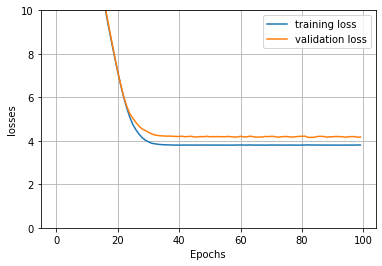

In [ ]:
plot_history(history)

## **Regression with a deep neural network (DNN)**

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

- The normalization layer, as before (with horsepower_normalizer for a single-input model and normalizer for a multiple-input model).
- Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
- A linear Dense single-output layer.



In [ ]:
def build_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(64,activation='relu'),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',optimizer = tf.keras.optimizers.Adam(0.001))
  return model

Regression using a DNN and multiple inputs

In [ ]:
dnn_model = build_compile_model(normalizer)

In [ ]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                640       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
train_features.shape

(314, 9)

Description of above model summary:

- there are 9 features so, output shape of Ist input layer = 9
- first hidden layer, contains 64 neurons which produces 64 outputs, number of parameter = number of weight * number of neuron + number of neuron(for bias),thus,
param = 64 * 64+64 = 640
- second hiiden layer also contains 64 neurons and hence 64 outputs,
param = 64 * 64 +64 = 4160
- The third hidden layer is output layer, it contains single neuron for single(1) output,
param = 64*1+1 = 65


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=100
)

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 22.2184 - val_loss: 22.2156
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 21.3904 - val_loss: 21.2454
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 20.3993 - val_loss: 20.0366
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 19.1512 - val_loss: 18.4727
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 17.5248 - val_loss: 16.4360
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 15.4706 - val_loss: 13.9866
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 13.0997 - val_loss: 11.5133
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 10.4669 - val_loss: 8.8312
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 7.6503 - val_loss: 6.2737
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 5.9156 - val_loss: 5.3353
Epoch 11/100


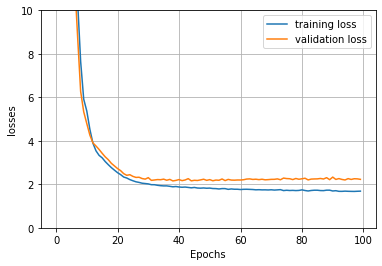

In [ ]:
plot_history(history)

In [ ]:
test_prediction = dnn_model.predict(test_features).flatten()

In [ ]:
test_prediction

array([15.425612 , 11.102876 , 10.944362 , 25.13359  , 20.817572 ,
       12.387381 , 13.156373 , 11.8917465, 19.122957 , 31.800465 ,
       24.450933 , 27.075424 , 14.894553 , 26.102402 , 12.741242 ,
       14.586909 , 14.734118 , 13.073918 , 18.464006 , 12.633803 ,
       14.058281 , 25.608654 , 18.778738 , 19.795675 , 30.604836 ,
       23.530676 , 16.499773 , 23.477827 , 17.278223 , 19.093685 ,
       28.643755 , 20.949877 , 18.632097 , 20.72251  , 26.044353 ,
       16.002348 , 18.98475  , 31.238882 , 30.421673 , 17.684084 ,
       31.405695 , 29.577883 , 15.883655 , 35.886982 , 35.133068 ,
       35.488026 , 20.670961 , 21.553097 , 20.78108  , 25.891718 ,
       31.05422  , 17.388895 , 32.270382 , 18.187843 , 17.43595  ,
       17.716955 , 32.90893  , 35.126057 , 22.251183 , 25.232695 ,
       38.084103 , 32.691483 , 27.185978 , 27.577677 , 32.35085  ,
       39.228558 , 36.59802  , 35.4331   , 33.072964 , 29.704851 ,
       22.475212 , 20.876144 , 29.87124  , 30.517496 , 35.3516

In [ ]:
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64